In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU,Reshape
from keras.datasets import fashion_mnist

In [2]:
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = X_train / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
generator = Sequential()
generator.add(Dense(512, input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [4]:
discriminator = Sequential()
discriminator.add(Dense(1, input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='softmax'))

In [5]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [6]:
epochs = 10
batch_size = 64
noise_shape=100

for epoch in range(epochs):
    for i in range(X_train.shape[0]//batch_size):
        noise=np.random.normal(size=[batch_size, noise_shape])
        gen_image = generator.predict_on_batch(noise)
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]

        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)

        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)

        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False

        d_g_loss_batch =GAN.train_on_batch(noise, train_label)

1/1 [==============================] - 0s 77ms/step


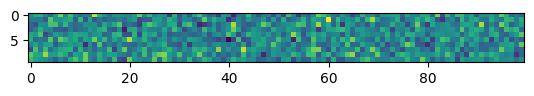

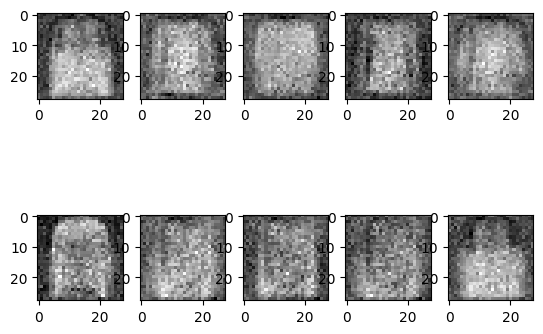

In [7]:
noise=np.random.normal(size=[10, noise_shape])

gen_image = generator.predict(noise)
plt.imshow(noise)

fig,axe=plt.subplots(2,5)
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1